# ***Reading, displaying, writing images***

In [244]:
# chainging the dir to workspace
import os
os.chdir("c://Users/nokia/Desktop/pluralsight/Mining Data from Images/")
print(f"workspace dir: \"{os.getcwd()}\"")

workspace dir: "c:\Users\nokia\Desktop\pluralsight\Mining Data from Images"


In [337]:
def list_workspace():
    """This function list all the files in the workspace"""
    print(f"workspace dir: \"{os.getcwd()}\"\n")
    print("Workspace files:")
    for i in os.listdir():
        print(f"- {i}")

list_workspace()

workspace dir: "c:\Users\nokia\Desktop\pluralsight\Mining Data from Images"

Workspace files:
- corners.jpg
- i_spy.jpg
- i_spy_template.jpg
- labels.csv
- labels[ref].txt
- lk.JPG
- lk_flip.JPG
- lk_modified.JPG
- lk_new.JPG
- mining-data-images
- Notebook-Region of intrest.ipynb


In [338]:
# importing required libraries and functions
import cv2
import matplotlib.pyplot as plt

def plt_img(img, size = None):
    if size is not None:
        plt.figure(figsize=size)
    img_new = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.imshow(img_new)

In [339]:
# reading an image from the current workspace
img = cv2.imread(r"lk.JPG")

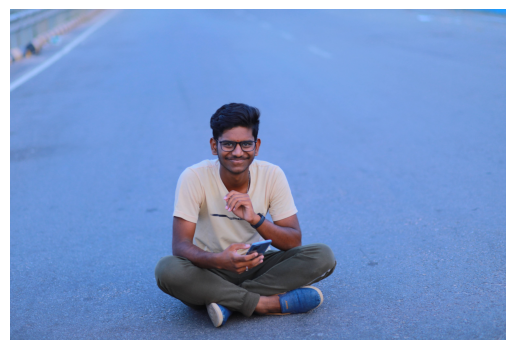

In [340]:
# displaing the image with matplotlib function [defined in cmd 3]
plt_img(img)

In [341]:
# writing the image to the current workspace
cv2.imwrite("lk_new.JPG",img)

True

---

# ***Accessing and modifing Pixel values***

In [342]:
def img_props(img):
    # Image properties
    print(f"""
    Type of the image: {type(img)}
    Shape of the image: {img.shape}
    Size of the image: {img.size}
    Data type of the image: {img.dtype}
    """)

In [343]:
# Image properties
img_props(img)


    Type of the image: <class 'numpy.ndarray'>
    Shape of the image: (3265, 4898, 3)
    Size of the image: 47975910
    Data type of the image: uint8
    


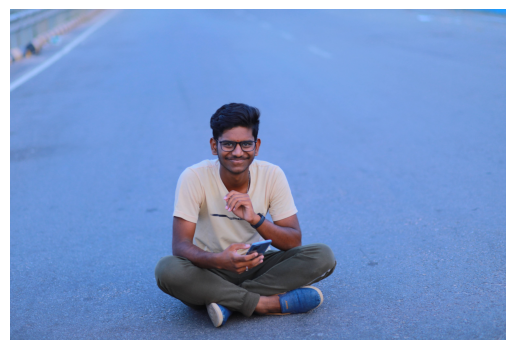

In [344]:
# modifying the image
# img[:,0:100,:] = [0,0,0]

# Displaying the modified image
plt_img(img)

In [345]:
img.shape

(3265, 4898, 3)

In [346]:
# use below link to get points of the region of intrest
# LINK: https://www.makesense.ai/ >> object detection

In [347]:
### !!! UNCOMMENT THIS !!!
# import webbrowser
# webbrowser.open_new_tab("https://www.makesense.ai/")

In [348]:
import pandas as pd
df = pd.read_csv("labels.csv")

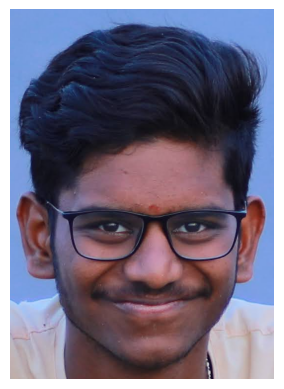

In [349]:
x,y,w,h = list(df[["bbox_x","bbox_y","bbox_width","bbox_height"]].to_numpy()[0])
plt_img(img[y:y+h,x:x+w])

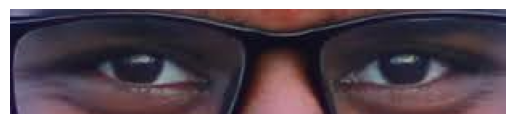

In [350]:
x,y,w,h = list(df[["bbox_x","bbox_y","bbox_width","bbox_height"]].to_numpy()[1])
plt_img(img[y:y+h,x:x+w])

---

In [351]:
# copy the image
img_d = img.copy()

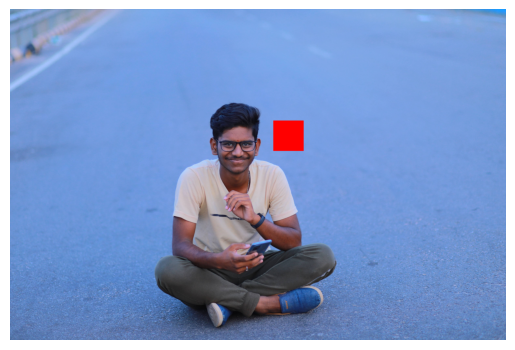

In [352]:
# modify the image
img_d = img.copy()
img_d[1100:1400,2600:2900,:] = [0,0,255]
plt_img(img_d)

In [353]:
# save the modified image
cv2.imwrite("lk_modified.JPG",img_d)

True

In [354]:
list_workspace()

workspace dir: "c:\Users\nokia\Desktop\pluralsight\Mining Data from Images"

Workspace files:
- corners.jpg
- i_spy.jpg
- i_spy_template.jpg
- labels.csv
- labels[ref].txt
- lk.JPG
- lk_flip.JPG
- lk_modified.JPG
- lk_new.JPG
- mining-data-images
- Notebook-Region of intrest.ipynb


---

# *SUBTRACTION COMPARISON*

In [355]:
import numpy as np

In [356]:
img1 = cv2.imread("lk.JPG")
img2 = cv2.imread("lk.JPG")
img3 = cv2.imread("lk_modified.JPG")
img4 = cv2.imread("lk_flip.JPG")

In [357]:
diff12 = cv2.subtract(img1,img2)
diff13 = cv2.subtract(img1,img3)
diff14= cv2.subtract(img1,img4)

In [358]:
print(f"The difference between img1 and img2: {np.sum(diff12)}")
print(f"The difference between img1 and img3: {np.sum(diff13)}")
print(f"The difference between img1 and img4: {np.sum(diff14)}")

The difference between img1 and img2: 0
The difference between img1 and img3: 38024076
The difference between img1 and img4: 461295872


In [359]:
def img_similarity(diff):
    total_pixels_value_count = img.shape[0] * img.shape[1] * img.shape[2] * 255
    print(f"Similarity between two images: {round((1 - (np.sum(diff)/total_pixels_value_count))*100,2)}%")

img_similarity(diff12)
img_similarity(diff13)
img_similarity(diff14)

Similarity between two images: 100.0%
Similarity between two images: 99.69%
Similarity between two images: 96.23%


In [360]:
# TO GET CLARITY JUST UNCOMMENT THE BELOW LINES ONCE AT A TIME
# plt_img(diff12)
# plt_img(diff13)
# plt_img(diff14)

# THE BLACK REGION IS THE SIMILAITY REGION IN THE IMAGES

---

# *HISTOGRAM COMPARISION*

In [361]:
# Creation of histogram for the images
img1_hist = cv2.calcHist([img1],[0],None,[256],[0,256])
img2_hist = cv2.calcHist([img2],[0],None,[256],[0,256])
img3_hist = cv2.calcHist([img3],[0],None,[256],[0,256])
img4_hist = cv2.calcHist([img4],[0],None,[256],[0,256])

In [362]:
# UNCOMMENT THE BELOW LINES TO SEE THE HISTOGRAMS
# plt.plot(img1_hist)
# plt.plot(img2_hist)
# plt.plot(img3_hist)
# plt.plot(img4_hist)
# plt.show()

In [363]:
# Comparision of histograms
img1_img2 = cv2.compareHist(img1_hist,img2_hist,0)
img1_img3 = cv2.compareHist(img1_hist,img3_hist,0)
img1_img4 = cv2.compareHist(img1_hist,img4_hist,0)

In [364]:
print(f"The similarity between img1 and img2: {img1_img2*100} %")
print(f"The similarity between img1 and img3: {img1_img3*100} %")
print(f"The similarity between img1 and img4: {img1_img4*100} %")

The similarity between img1 and img2: 100.0 %
The similarity between img1 and img3: 99.89124535301212 %
The similarity between img1 and img4: 99.99223002444842 %


---

# ***FEATURE DETECTION***

# *FEATURE DETECTION METHODS*
- *Harris Corner Detection*
- *Shi-Tomasi Corner Detection*
- *SIFT*
- *SURF*
- *SLAM*
- *FAST*

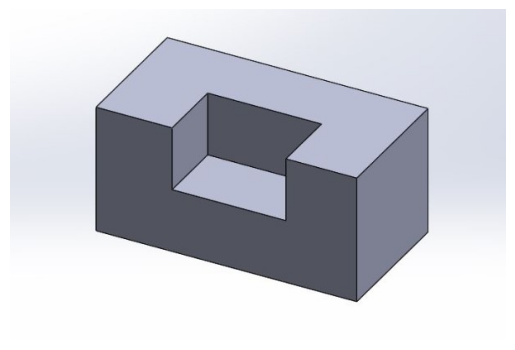

In [365]:
# Reading the image
img = cv2.imread("corners.jpg")
plt_img(img)

In [366]:
# Converting the image to gray scale and float32
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray = np.float32(img_gray)

In [367]:
help(cv2.cornerHarris)

Help on built-in function cornerHarris:

cornerHarris(...)
    cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) -> dst
    .   @brief Harris corner detector.
    .   
    .   The function runs the Harris corner detector on the image. Similarly to cornerMinEigenVal and
    .   cornerEigenValsAndVecs , for each pixel \f$(x, y)\f$ it calculates a \f$2\times2\f$ gradient covariance
    .   matrix \f$M^{(x,y)}\f$ over a \f$\texttt{blockSize} \times \texttt{blockSize}\f$ neighborhood. Then, it
    .   computes the following characteristic:
    .   
    .   \f[\texttt{dst} (x,y) =  \mathrm{det} M^{(x,y)} - k  \cdot \left ( \mathrm{tr} M^{(x,y)} \right )^2\f]
    .   
    .   Corners in the image can be found as the local maxima of this response map.
    .   
    .   @param src Input single-channel 8-bit or floating-point image.
    .   @param dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same
    .   size as src .
    .   @param blockSize Neighb

In [368]:
# Implementing the corner detection[Harris corner detection]
img_cornerDetect = cv2.cornerHarris(img_gray,2,3,0.04)

# Dilating the image to get better visualization of the corners
img_cornerDetect = cv2.dilate(img_cornerDetect,None)

# Marking the corners in the image with red color whose value is greater than 0.01*max(img_cornerDetect)
img[img_cornerDetect>0.01*img_cornerDetect.max()] = [0,0,255]

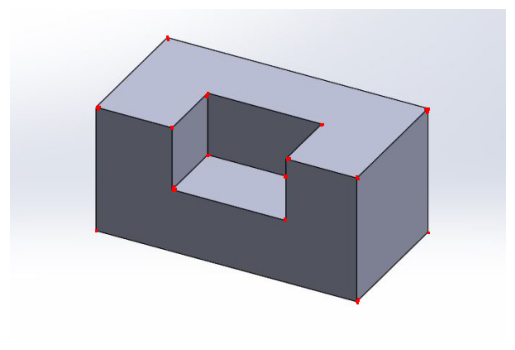

In [369]:
plt_img(img)

---

# ***TEMPLATE MATCHING***

Template matching is like finding an sub image in an image.

In [370]:
list_workspace()

workspace dir: "c:\Users\nokia\Desktop\pluralsight\Mining Data from Images"

Workspace files:
- corners.jpg
- i_spy.jpg
- i_spy_template.jpg
- labels.csv
- labels[ref].txt
- lk.JPG
- lk_flip.JPG
- lk_modified.JPG
- lk_new.JPG
- mining-data-images
- Notebook-Region of intrest.ipynb


In [386]:
# Read the images
org_img = cv2.imread("i_spy.jpg")
temp_img = cv2.imread("i_spy_template.jpg")

The Original image


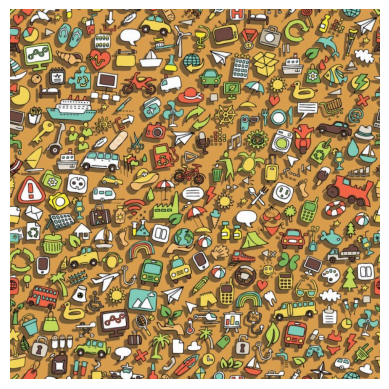

In [387]:
# Dispaly the original image
print("The Original image")
plt_img(org_img)

The Template image


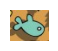

In [385]:
# Dispal
print("The Template image")
plt_img(temp_img,(.5,.5))

In [382]:
cv2.matchTemplate(org_img,temp_img,0)

array([[27616226., 27992146., 28736092., ..., 32656584., 33465654.,
        33781488.],
       [27339034., 27637694., 28705648., ..., 32727004., 33477518.,
        33353648.],
       [27796218., 28093318., 28521044., ..., 31869174., 32425944.,
        32304598.],
       ...,
       [26618960., 26510868., 26586568., ..., 23736910., 24918976.,
        25999134.],
       [26492536., 26423536., 26569642., ..., 23758844., 24546972.,
        25623968.],
       [26562128., 26752288., 26933542., ..., 24295596., 24598212.,
        25170808.]], dtype=float32)